In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

In [ ]:
# Read Data Files
cardio_dataset_raw = pd.read_csv("../input/cardio_train.csv",sep=";")

print("Dataset memiliki " + str(len(cardio_dataset_raw)) + " baris dan " + str(len(cardio_dataset_raw.columns)) + " kolom")
print()
print(cardio_dataset_raw.head())

In [ ]:
# Cek semua deskripsi label pada dataset

for i in range(len(cardio_dataset_raw.columns)):
    print(cardio_dataset_raw[cardio_dataset_raw.columns[i]].describe())
    print()

In [ ]:
# Cek semua label, lihat apakah terdapat NULL
for i in range(len(cardio_dataset_raw.columns)):
    print("Label " + cardio_dataset_raw.columns[i] + " memiliki " + str(cardio_dataset_raw[cardio_dataset_raw.columns[i]].isnull().sum()) + " data kosong")

In [ ]:
# Cek data outlier pada setiap label menggunakan IQR (InterQuartile Range)

copy_of_cardio_dataset_raw = cardio_dataset_raw.copy()

# Menentukan label apa saja yang ingin dicek outliernya. Yang dicek hanyalah label yang bersifat numerical (bukan categorical maupun identifier)
check_outlier_column = ['age','height','weight','ap_hi','ap_lo']

row_with_outlier = []

# Cek IQR pada semua label
Q1 = copy_of_cardio_dataset_raw.quantile(0.25)
Q3 = copy_of_cardio_dataset_raw.quantile(0.75)

IQR = Q3 - Q1
rangeBawah = (Q1 - 1.5 * IQR) // 1
rangeAtas = (Q3 + 1.5 * IQR) // 1

for i in range(len(check_outlier_column)):
    countOutlier = 0
    for j in range(len(copy_of_cardio_dataset_raw)):
        
        #Cek apakah data lebih kecil dari Q1 - 1.5 * IQR
        if(copy_of_cardio_dataset_raw.loc[j][check_outlier_column[i]] < rangeBawah[check_outlier_column[i]]): 
            countOutlier = countOutlier + 1
            row_with_outlier.append(j)
        
        #Cek apakah data lebih besar dari Q3 + 1.5 * IQR
        elif(copy_of_cardio_dataset_raw.loc[j][check_outlier_column[i]] > rangeAtas[check_outlier_column[i]]):
            countOutlier = countOutlier + 1
            row_with_outlier.append(j)
            
    print("Label " + check_outlier_column[i] + " memiliki " + str(countOutlier) + " data outlier")

In [ ]:
# Cek outlier menggunakan boxplot
import seaborn as sns
import matplotlib.pyplot as plt
for col in check_outlier_column:
    sns.boxplot(x=copy_of_cardio_dataset_raw[col])
    plt.show()

In [ ]:
# Cek row yang memiliki outlier, hapus row duplikasi, kemudian sort row dari terbesar ke terkecil
row_with_outlier = list(dict.fromkeys(row_with_outlier))

# Sort row dari terbesar ke terkecil
for i in range(len(row_with_outlier)):
    swap = i + np.argmax(row_with_outlier[i:])
    (row_with_outlier[i], row_with_outlier[swap]) = (row_with_outlier[swap], row_with_outlier[i])

print(row_with_outlier)


In [ ]:
cleaned_cardio_dataset = copy_of_cardio_dataset_raw.copy().drop(row_with_outlier, axis=0)

print("Dataset memiliki " + str(len(cleaned_cardio_dataset)) + " baris dan " + str(len(cleaned_cardio_dataset.columns)) + " kolom")
print()
print(cleaned_cardio_dataset.head(5))

Pearson’s Correlation Coefficient helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson’s Correlation Coefficient can be between -1 to +1.

1 means that they are highly correlated and 0 means no correlation. -1 means that there is a negative correlation. Think of it as an inverse proportion.

https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/

<function matplotlib.pyplot.show(*args, **kw)>

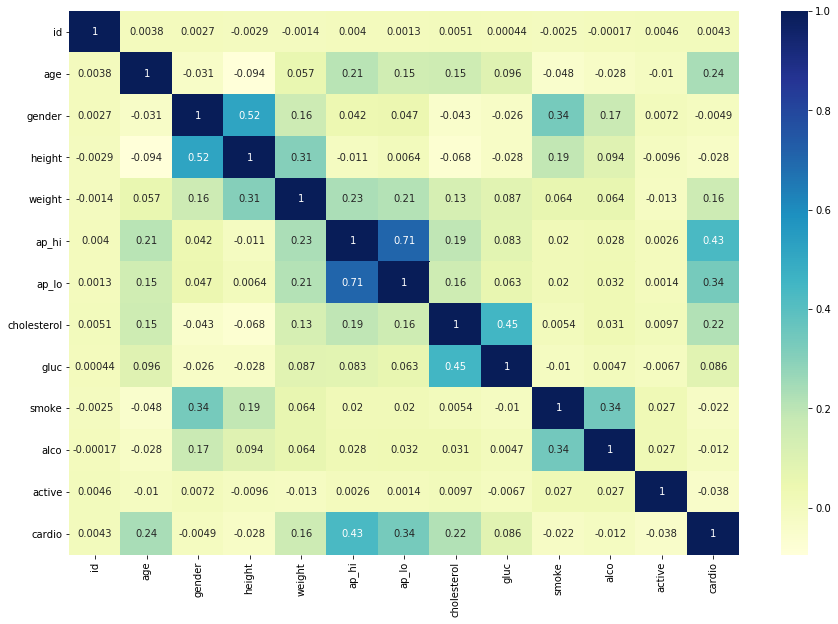

In [19]:
sns.heatmap(cleaned_cardio_dataset.corr(),annot=True,cmap='YlGnBu')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show

Kami akan mengambil cardio sebagai label, dan menentukan fitur berdasarkan plotting correlation dengan metode Pearson di atas. Dari plotting tersebut, kami memutuskan untuk memilih age, weight, ap_hi, ap_lo, dan chole

In [20]:
final_cardio = cleaned_cardio_dataset.copy().drop(columns=['id', 'gender', 'height', 'smoke', 'alco', 'active'])
final_cardio.head(5)

,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
0,18393,62.0,110,80,1,1,0
1,20228,85.0,140,90,3,1,1
2,18857,64.0,130,70,3,1,1
3,17623,82.0,150,100,1,1,1
5,21914,67.0,120,80,2,2,0


In [21]:
final_cardio.describe()

,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
count,62532.000000,62532.000000,62532.000000,62532.000000,62532.000000,62532.000000,62532.000000
mean,19493.961332,73.173645,126.421336,81.699290,1.357673,1.220655,0.493971
std,2458.047517,12.277918,14.292588,7.673729,0.675137,0.567597,0.499968
min,14282.000000,39.000000,90.000000,65.000000,1.000000,1.000000,0.000000
25%,17725.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000
50%,19718.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000
75%,21342.000000,81.000000,140.000000,90.000000,1.000000,1.000000,1.000000
max,23713.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000


In [22]:
y_cardio = final_cardio['cardio']
x_cardio = final_cardio.drop('cardio', axis=1)

In [23]:
y_cardio.head(5)

0    0
1    1
2    1
3    1
5    0
Name: cardio, dtype: int64

In [24]:
x_cardio.head(5)

,age,weight,ap_hi,ap_lo,cholesterol,gluc
0,18393,62.0,110,80,1,1
1,20228,85.0,140,90,3,1
2,18857,64.0,130,70,3,1
3,17623,82.0,150,100,1,1
5,21914,67.0,120,80,2,2


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_cardio, y_cardio, test_size=0.3)

In [28]:
print("Data training {}, data testing {}".format(x_train.shape, x_test.shape))

Data training (43772, 6), data testing (18760, 6)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
for col in x_train.columns:
    x_train[col] = scaler.fit_transform(np.array(x_train[col]).reshape(-1,1))
x_train.head()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,age,weight,ap_hi,ap_lo,cholesterol,gluc
55349,1.243476,-0.097416,0.251647,-0.219608,-0.529908,3.118495
60822,1.301344,-0.831465,-0.450708,-0.219608,-0.529908,-0.389311
3256,-2.035005,-1.239269,-1.153063,-0.219608,0.948620,1.364592
32787,1.515698,1.533803,0.251647,-0.219608,-0.529908,-0.389311
63003,0.411325,-0.423660,-1.153063,-0.219608,-0.529908,-0.389311


In [31]:
for col in x_train.columns:
    x_test[col] = scaler.fit_transform(np.array(x_test[col]).reshape(-1,1))
x_test.head()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,age,weight,ap_hi,ap_lo,cholesterol,gluc
50377,0.661082,0.558137,-0.446019,-1.528879,-0.529495,-0.387481
43079,1.285559,-0.659656,-0.446019,1.077417,-0.529495,-0.387481
22919,0.479939,0.801695,0.247501,-0.225731,-0.529495,-0.387481
12268,-0.536405,1.532371,1.287781,1.077417,0.957976,-0.387481
49072,-0.830610,0.395764,0.941021,1.077417,2.445446,-0.387481
